In [1]:
import pandas as pd 
import ruptures as rpt


In [2]:
def df_of_daily_count(csv_file, sep = ','):
    column_names = ["Date", "Count"]
    return pd.read_csv(csv_file, sep=sep, names=column_names, index_col="Date")

def line_graph_of_daily_count(df, title):
    df.plot.line(
        title="BLM tweets " + title,
        figsize = (15,6),
        logy = True,
        )

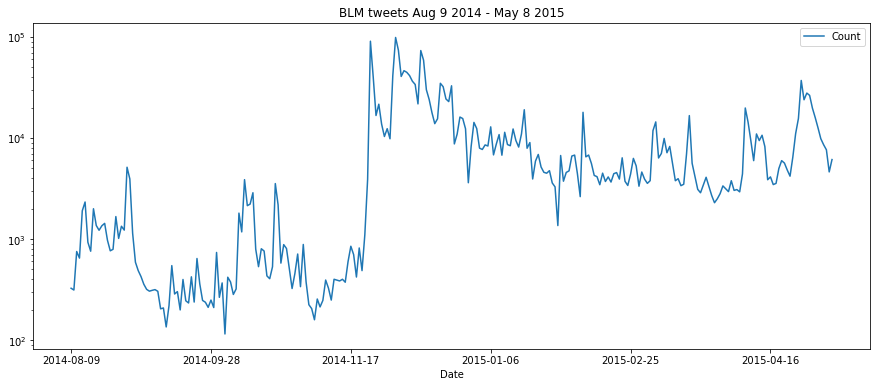

In [3]:
first_counts_file = "../data/counts/tweetCount2014-2015.csv"
first_sep = ','
df_first_counts = df_of_daily_count(first_counts_file, sep=first_sep)
line_graph_of_daily_count(df_first_counts, "Aug 9 2014 - May 8 2015")


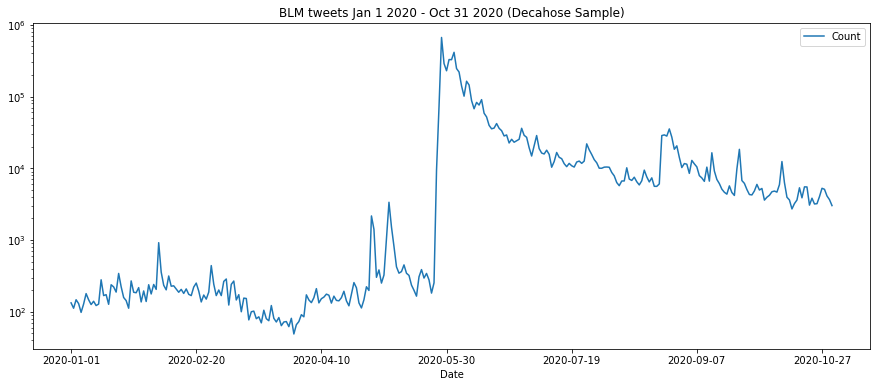

In [4]:
second_counts_file = "../data/counts/tweetCount2020.txt"
second_sep = '\t'
df_second_counts = df_of_daily_count(second_counts_file, sep=second_sep)
line_graph_of_daily_count(df_second_counts, "Jan 1 2020 - Oct 31 2020 (Decahose Sample)")

In [5]:
n_bkps = 2
loss = 'l2'

algo_2014 = rpt.BottomUp(model=loss).fit(df_first_counts.Count.values)
bkps_2014 = algo_2014.predict(n_bkps=n_bkps)
print("2014-2015 boundaries on days:", bkps_2014)


2014-2015 boundaries on days: [105, 140, 273]


In [6]:
algo_2020 = rpt.BottomUp(model=loss).fit(df_second_counts.Count.values)
bkps_2020 = algo_2020.predict(n_bkps=n_bkps)
print("2020 boundaries on days:", bkps_2020)

2020 boundaries on days: [145, 165, 305]


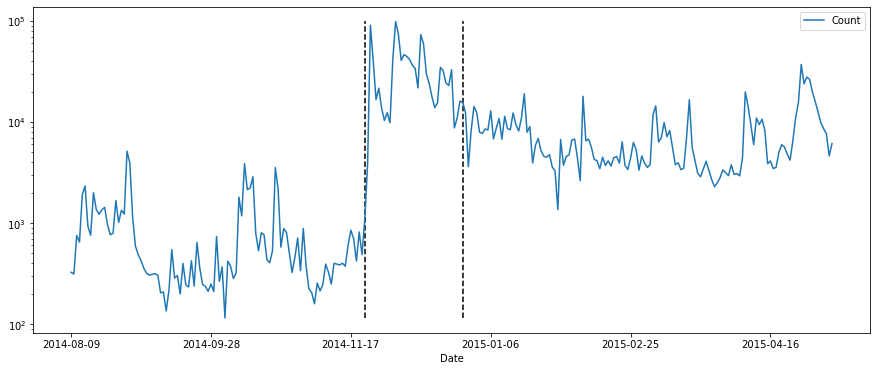

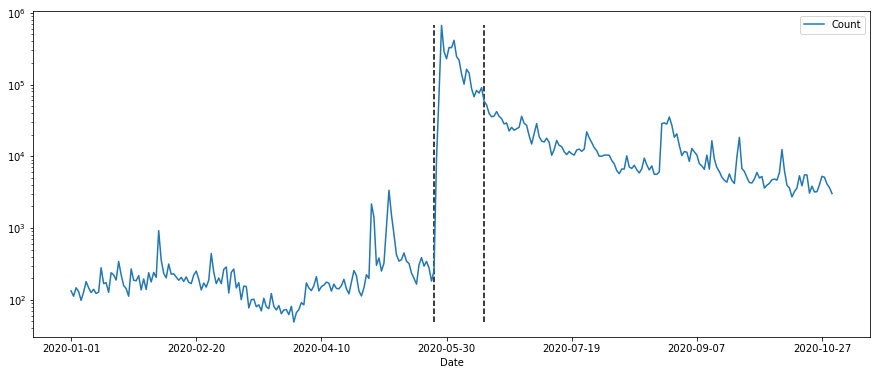

In [9]:
def display_counts_with_bkps(df, bkps, title):
    min_count = min(df.Count)
    max_count = max(df.Count)
    labels = [str(df.index[bkps[0]]), str(df.index[bkps[1]])]
    axes = df.plot.line(
        # title="Count of BLM tweets " + title,
        figsize = (15,6),
        logy = True,
    )
    axes.vlines(bkps[:2], min_count, max_count, linestyles='dashed')

display_counts_with_bkps(df_first_counts, bkps_2014, "Aug 9 2014 - May 8 2015")
display_counts_with_bkps(df_second_counts, bkps_2020, "Jan 1 2020 - Oct 31 2020 (Decahose Sample)")

In [8]:
def print_changepoint_days(df, bkps, title):
    print("Change point dates during period " + title)
    print(df.index[bkps[0]])
    print(df.index[bkps[1]])
    print()

print_changepoint_days(df_first_counts, bkps_2014, "Aug 9 2014 - May 8 2015")
print_changepoint_days(df_second_counts, bkps_2020, "Jan 1 2020 - Oct 31 2020")

Change point dates during period Aug 9 2014 - May 8 2015
2014-11-22
2014-12-27

Change point dates during period Jan 1 2020 - Oct 31 2020
2020-05-25
2020-06-14

